# Numerické řešení Dirichletovy úlohy pro Poissonovu parciální diferenciální rovnici metodou sítí

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def zobrazit_obr(matice):
    obrazek = np.array([[hodnota['uf'] for hodnota in sloupec] for sloupec in matice])
    obrazek = np.rot90(obrazek)

    plt.figure(figsize=(10,10))
    plt.imshow(obrazek, cmap='jet', extent=[0, 2.134, 0, 1])
    plt.colorbar(shrink = 0.5)
    plt.show()

## Pocatecni podminky

In [104]:
x_0, x_n = 0. , 2.134
y_0, y_n = 0. , 1.
h = 0.01
pocet_deleni_x = 200
pocet_deleni_y = 100

## Definice matice s realnych souradnic

In [105]:
x = np.arange(x_0, x_n+h, h)
y = np.arange(y_0, y_n+h, h)

mat_info_oblasti = [[{"souradnice": (x[j], y[i]), "typ": "menitelne", "uf": 0.} for i in range(len(y))] for j in range(len(x))]

print(f"x0,y0:{mat_info_oblasti[0][0]['souradnice']}, xn,y0: {mat_info_oblasti[-1][0]['souradnice']}")
print(f"x0,yn:{mat_info_oblasti[0][-1]['souradnice']}, xn,yn: {mat_info_oblasti[-1][-1]['souradnice']}")

matice = np.array(mat_info_oblasti)
print(f"matice:{matice.shape}")

x0,y0:(0.0, 0.0), xn,y0: (2.14, 0.0)
x0,yn:(0.0, 1.0), xn,yn: (2.14, 1.0)
matice:(215, 101)


## Definice oblasti a jejich hodnot

na okrajich

In [106]:
# oblast = np.zeros((len(x),len(y)), dtype= float)
for i in range(len(y)): 
    mat_info_oblasti[0][i]['uf'] = 300.
    mat_info_oblasti[-1][i]['uf'] = 300.
    mat_info_oblasti[0][i]['typ'] = 'okraj'
    mat_info_oblasti[-1][i]['typ'] = 'okraj'
    
for i in range(len(x)): 
    mat_info_oblasti[i][0]['uf'] = 300.
    mat_info_oblasti[i][-1]['uf'] = 300.
    mat_info_oblasti[i][0]['typ'] = 'okraj'
    mat_info_oblasti[i][-1]['typ'] = 'okraj'

In [107]:
# oblast = np.zeros((len(x),len(y)), dtype= float)
# for i in range(len(y)): 
#     oblast[0][i] = 300.
#     oblast[-1][i] = 300.
#     matice_puv_sour[0][i]['typ'] = 'okraj'
#     matice_puv_sour[-1][i]['typ'] = 'okraj'
# for i in range(len(x)): 
#     oblast[i][0] = 300.
#     oblast[i][-1] = 300.
#     matice_puv_sour[i][0]['typ'] = 'okraj'
#     matice_puv_sour[i][-1]['typ'] = 'okraj'
# oblast

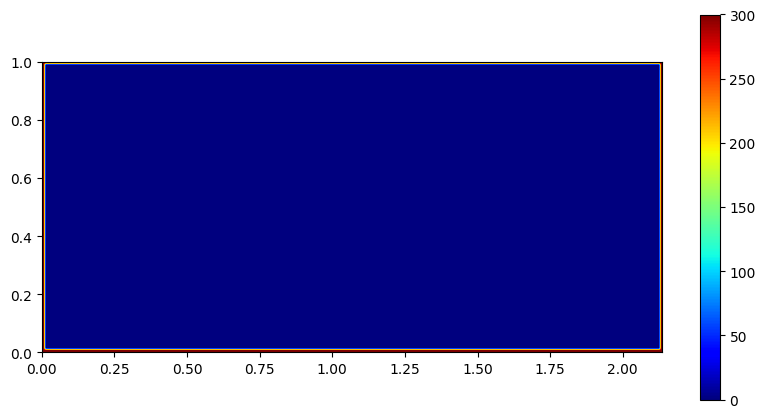

In [108]:
zobrazit_obr(mat_info_oblasti)

vyhledani okrajovych bodu zdroje

In [109]:
def hledani_indexu(hledana_hodnota, matice_puv_sour, n = 2):
    for i in range(len(matice_puv_sour)): # x
        for j in range(len(matice_puv_sour[0])): # y
            
            if all(np.round(matice_puv_sour[i][j]["souradnice"],n) == np.round(hledana_hodnota, n)):
                return [i,j]

nalezene okraje

In [110]:
hledane_prveky = [(0.25, 0.25), (0.75,0.25), (0.25, 0.75), (0.75, 0.75)]

indexy = []
for prvek in hledane_prveky:
    idx = hledani_indexu(prvek, mat_info_oblasti)
    indexy.append(idx)
l_niz, p_niz, l_vrh, p_vrh = indexy
print(l_niz, p_niz, l_vrh, p_vrh)

[25, 25] [75, 25] [25, 75] [75, 75]


In [111]:
for i in range(l_niz[0], p_niz[0]+1): 
    for j in range(l_niz[1], l_vrh[1]+1):
        mat_info_oblasti[i][j]['uf'] = -10000.
        mat_info_oblasti[i][j]['typ'] = 'zdroj'

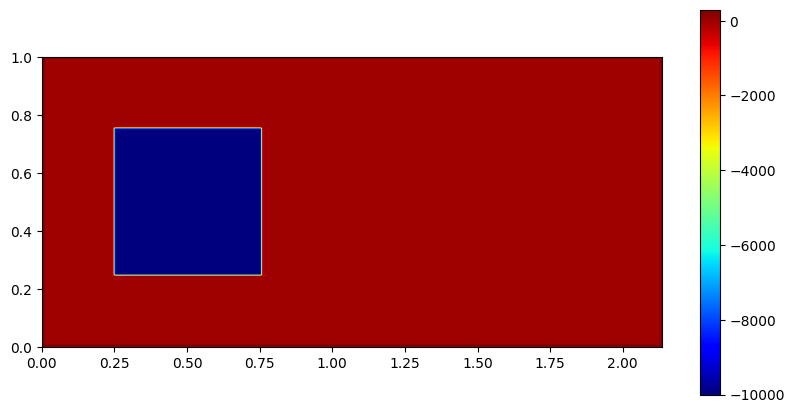

In [112]:
zobrazit_obr(mat_info_oblasti)

In [113]:
# from copy import deepcopy

# matice_zmen = np.array([[hodnota['uf'] for hodnota in sloupec] for sloupec in mat_info_oblasti])
# nova_matice_zmen = deepcopy(matice_zmen)

# for n in range(1000):
#     for i in range(len(mat_info_oblasti)):
#         for j in range(len(mat_info_oblasti[0])):
#             if mat_info_oblasti[i][j]['typ'] == "menitelne":
#                 nova_matice_zmen[i][j] = 1/4 * (matice_zmen[i+1][j] + matice_zmen[i-1][j] 
#                                     + matice_zmen[i][j+1] + matice_zmen[i][j-1] )

                
#     matice_zmen = deepcopy(nova_matice_zmen)

In [114]:
from copy import deepcopy

imgs_cesty = []

matice_zmen = np.array([[hodnota['uf'] for hodnota in sloupec] for sloupec in mat_info_oblasti])
nova_matice_zmen = deepcopy(matice_zmen)

for n in range(1000):
    for i in range(len(mat_info_oblasti)):
        for j in range(len(mat_info_oblasti[0])):
            if mat_info_oblasti[i][j]['typ'] == "menitelne":
                nova_matice_zmen[i][j] = 1/4 * (matice_zmen[i+1][j] + matice_zmen[i-1][j] 
                                    + matice_zmen[i][j+1] + matice_zmen[i][j-1] )

    if n % 10 == 0:
        obrazek = np.rot90(matice_zmen)
        plt.imshow(obrazek, cmap='jet', extent=[0, 2.134, 0, 1])
        plt.colorbar(shrink = 0.5)
        plt.title(f'Krok {n+1}')
        plt.savefig(f'imgs/krok_{n+1}.png')
        plt.close()
        imgs_cesty.append(f'imgs/krok_{n+1}.png')
                    
    matice_zmen = deepcopy(nova_matice_zmen)

In [117]:
import imageio
import os

with imageio.get_writer('simulace.gif', mode='I', duration=0.01) as writer:
    for path in imgs_cesty:
        image = imageio.imread(path)
        writer.append_data(image)

for cesta in imgs_cesty:
    os.remove(cesta)

C:\Users\Home\AppData\Local\Temp\ipykernel_12184\3632511680.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)


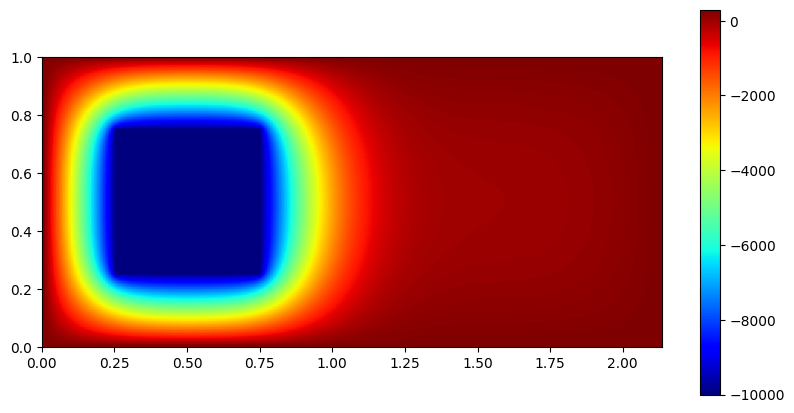

In [118]:
obrazek = deepcopy(nova_matice_zmen)
obrazek = np.rot90(obrazek)
plt.figure(figsize=(10,10))
plt.imshow(obrazek, cmap='jet',extent=[0, 2.134, 0, 1] )
plt.colorbar(shrink = 0.5)
plt.show()